# Problem statement

  Approach
  
* Data cleaning

* Data validation

* EDA

* Data visualization

* Recommendation & conclusion

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

df= pd.read_csv("retail_sales_dataset.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
# check for duplicates

df.duplicated().sum()

0

In [6]:
print("RETAIL SALES DATA ANALYSIS")
print("_" * 40)

df["Product Category"].value_counts()

RETAIL SALES DATA ANALYSIS
________________________________________


Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [7]:
df["Gender"].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [31]:
# Monthly Sales
df["MONTH_NAME"] = df["Date"].dt.month_name()
if len(df["MONTH"].unique()) > 1:
    monthly_sales = df.groupby(["MONTH","MONTH_NAME"])["Total Amount"].sum().reset_index()
    monthly_sales = monthly_sales.sort_values("MONTH")
    print(f"\nMonthly Sales Trend:") 
    for idx, row in monthly_sales.iterrows():
        print(f" {row['MONTH_NAME']}: ${row['Total Amount']:,.2f}")


Monthly Sales Trend:
 January: $35,450.00
 February: $44,060.00
 March: $28,990.00
 April: $33,870.00
 May: $53,150.00
 June: $36,715.00
 July: $35,465.00
 August: $36,960.00
 September: $23,620.00
 October: $46,580.00
 November: $34,920.00
 December: $44,690.00
 January: $1,530.00


In [9]:
#Number of Customers
Total_Customers = df["Customer ID"].value_counts().sum()
print(f"Total Customers: {Total_Customers}")

Total Customers: 1000


In [10]:
Total_Revenue = df["Total Amount"].sum()
print(f"Total Revenue: ${Total_Revenue}")

Total Revenue: $456000


In [11]:
total_unit_sold = df["Quantity"].sum()
print(f"Total Unit Sold: {total_unit_sold}")

Total Unit Sold: 2514


In [12]:
total_transactions = df["Transaction ID"].nunique()
print(f"Total Transactions: {total_transactions}")

Total Transactions: 1000


In [13]:
avg_transaction_value = Total_Revenue / total_transactions
print(f"Average Transaction Value: ${avg_transaction_value}")

Average Transaction Value: $456.0


In [14]:
# Customer Behavior KPIs 
print("\n2. CUSTOMER BEHAVIOR KPIs")
print("-" * 40)

total_customers = df["Customer ID"].nunique()
transactions_per_customers = df.groupby("Customer ID")["Transaction ID"].nunique()
repeat_customers = (transactions_per_customers > 1).sum()
repeat_purchase_rate = (repeat_customers / total_customers * 100) if total_customers > 0 else 0

customer_spend = df.groupby("Customer ID")["Total Amount"].sum()
avg_customer_value = customer_spend.mean()
clv = avg_customer_value * 1.5 

print(f"Total Unique Customer:{total_customers}")
print(f"Repeat Customers: {repeat_customers}")
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.1f}%")
print(f"Average Customer Value: ${avg_customer_value:.2f}")
print(f"Estimated Customer Lifetime Value: ${clv:.2f}")


2. CUSTOMER BEHAVIOR KPIs
----------------------------------------
Total Unique Customer:1000
Repeat Customers: 0
Repeat Purchase Rate: 0.0%
Average Customer Value: $456.00
Estimated Customer Lifetime Value: $684.00


In [15]:
revenue_by_gender = df.groupby('Gender')["Total Amount"].sum()
print(f" Revenue By Gender: {revenue_by_gender}")

 Revenue By Gender: Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [16]:
# Define  Age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd. cut(df['Age'], bins=bins, labels=labels,right=True)

sales_by_age = df.groupby('Age Group')['Total Amount'].sum().reset_index()
print(sales_by_age)

  Age Group  Total Amount
0     18-25         73335
1     26-35         98480
2     36-45         91870
3     46-55        100690
4     56-65         80410


In [18]:
# Product Performance KPIs
print("\n3. PRODUCT PERFORMANCE KPIs")
print("-" * 40)

category_performance = df.groupby("Product Category").agg({"Total Amount": "sum", 
                                    "Quantity":
                                    "sum",
                                    "Transaction ID": "count"}).rename(columns={"Transaction ID":"Transactions"})

category_performance["Avg Price"] = category_performance["Total Amount"] / category_performance["Quantity"]
category_performance["% of Revenue"] = (category_performance["Total Amount"] / Total_Revenue * 100).round(1)

print("Category Performance: ")
print(category_performance)


3. PRODUCT PERFORMANCE KPIs
----------------------------------------
Category Performance: 
                  Total Amount  Quantity  Transactions   Avg Price  \
Product Category                                                     
Beauty                  143515       771           307  186.141375   
Clothing                155580       894           351  174.026846   
Electronics             156905       849           342  184.811543   

                  % of Revenue  
Product Category                
Beauty                    31.5  
Clothing                  34.1  
Electronics               34.4  


In [20]:
# Top categories 
top_category = category_performance["Total Amount"].idxmax()
print(f"\nTop Perfroming Category: {top_category}")
print(f"Revenue from {top_category}: $ {category_performance.loc[top_category,'Total Amount']:,.2f}")


Top Perfroming Category: Electronics
Revenue from Electronics: $ 156,905.00


In [32]:
# Time - Based Analysis 
print("\n5. TIME-BASED ANALYSIS")
print("-" * 40)

# Monthly Analysis
monthly_summary = df.groupby(["Month","MONTH_NAME"]).agg({"Total Amount": ["sum", "mean", "count"], 
                                                         "Quantity": "sum"}).round(2)
print("Monthly Summary:")
print(monthly_summary)


5. TIME-BASED ANALYSIS
----------------------------------------
Monthly Summary:
                   Total Amount               Quantity
                            sum    mean count      sum
Month   MONTH_NAME                                    
2023-01 January           35450  466.45    76      195
2023-02 February          44060  518.35    85      214
2023-03 March             28990  397.12    73      194
2023-04 April             33870  393.84    86      214
2023-05 May               53150  506.19   105      259
2023-06 June              36715  476.82    77      197
2023-07 July              35465  492.57    72      176
2023-08 August            36960  393.19    94      227
2023-09 September         23620  363.38    65      170
2023-10 October           46580  485.21    96      252
2023-11 November          34920  447.69    78      205
2023-12 December          44690  491.10    91      207
2024-01 January            1530  765.00     2        4


In [34]:
# Day of week analysis df["Day_of_Week"] = df["Date"].dt.day_name()
df["Day_of_Week"] = df["Date"].dt.day_name()
dow_summary = df.groupby("Day_of_Week").agg({"Total Amount": ["sum","mean","count"]}).round(2)
print(f"\nDay of Week Performance: ")
print(dow_summary)



Day of Week Performance: 
            Total Amount              
                     sum    mean count
Day_of_Week                           
Friday             66290  463.57   143
Monday             70250  481.16   146
Saturday           78815  525.43   150
Sunday             58600  424.64   138
Thursday           53835  437.68   123
Tuesday            69440  431.30   161
Wednesday          58770  422.81   139


# Data Visualisation


6. GENERAL VISUALIZATION...
----------------------------------------
Dahboard saved as 'retail_analysis_dashboard.png'


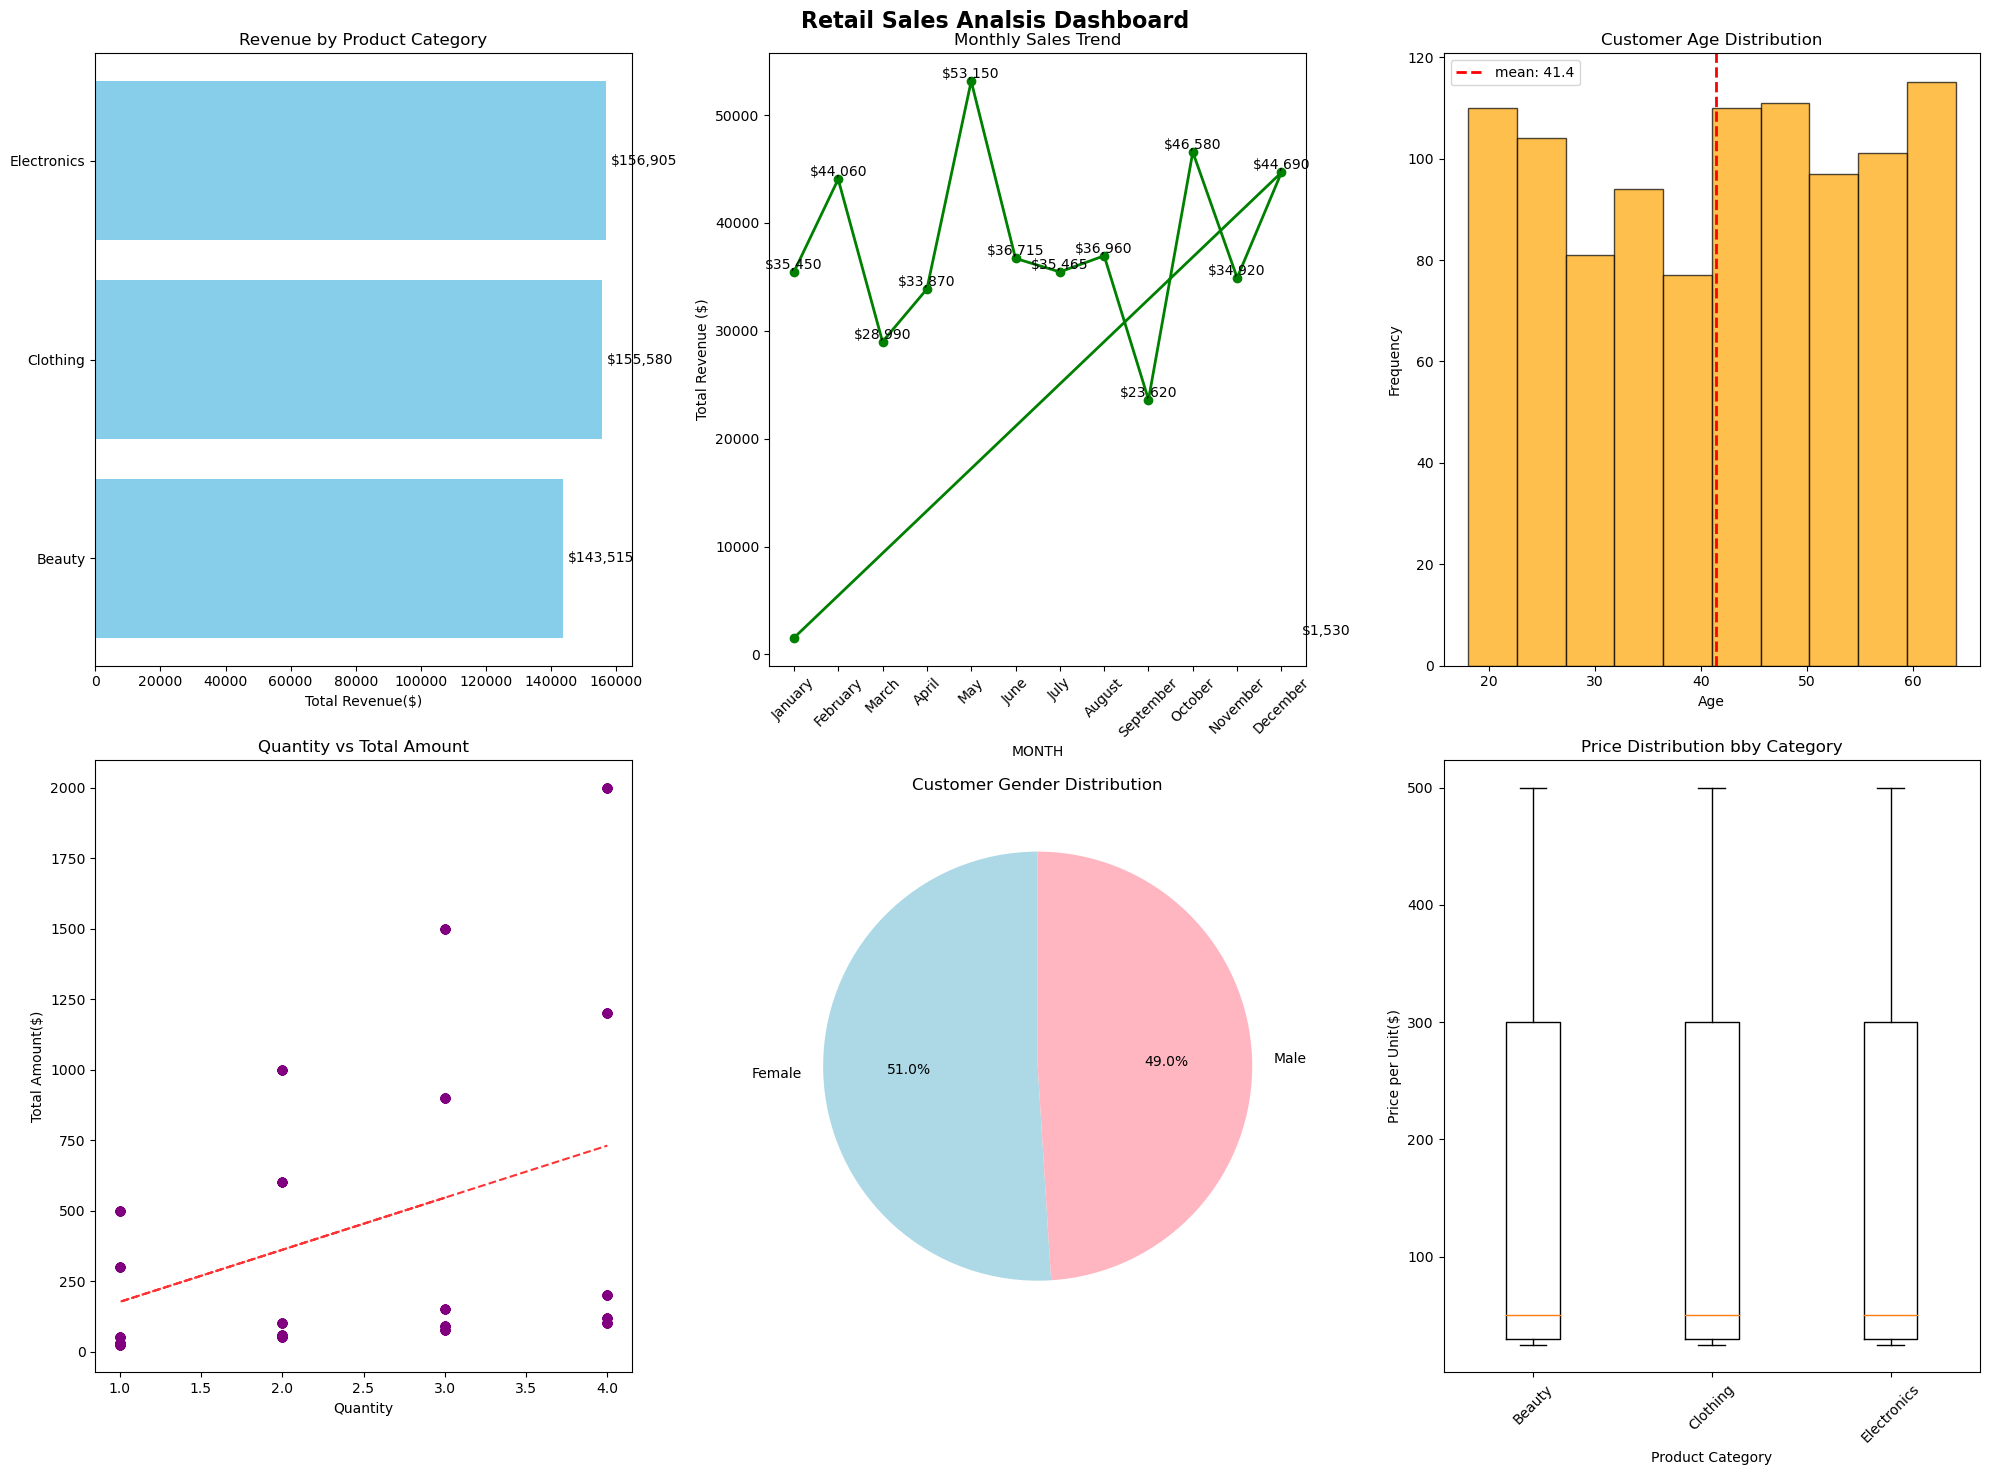

In [38]:
print("\n6. GENERAL VISUALIZATION...")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize =(20, 15))
fig.suptitle("Retail Sales Analsis Dashboard", fontsize= 16, fontweight ="bold")

# 1. Revenue by Category 
category_revenue = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending =True)
axes[0,0].barh(category_revenue.index,category_revenue.values, color="skyblue")
axes[0,0].set_title("Revenue by Product Category")
axes[0,0].set_xlabel("Total Revenue($)")
for i, v in enumerate(category_revenue.values):
    axes[0,0].text(v + max(category_revenue.values)*0.01, i, f"${v:,.0f}", va="center")

    
# 2. Monthly Sales Trend 
if len(df["MONTH"].unique()) > 1:
    monthly_trend = df.groupby(["MONTH", "MONTH_NAME"])["Total Amount"].sum().reset_index()
    monthly_trend = monthly_trend.sort_values("MONTH")
    axes[0,1].plot(monthly_trend["MONTH_NAME"],monthly_trend["Total Amount"], marker='o',
    linewidth = 2, color ="green")
    
    axes[0,1].set_title("Monthly Sales Trend")
    axes[0,1].set_xlabel("MONTH")
    axes[0,1].set_ylabel("Total Revenue ($)")
    axes[0,1].tick_params(axis ='x', rotation = 45)
    for x, y in zip(range(len(monthly_trend)),monthly_trend["Total Amount"]): 
        axes[0,1].text(x, y, f"${y:,.0f}", ha ="center", va = "bottom") 

# 3. Customer Age Distribution 
axes[0,2].hist(df["Age"], bins =10,
               edgecolor = 'black', alpha = 0.7, 
               color='orange')
axes[0,2].axvline(df["Age"].mean(),
                  color ='red', linestyle ="dashed", linewidth =2,
label = f"mean: {df['Age'].mean():.1f}")
axes[0,2].set_title("Customer Age Distribution")
axes[0,2].set_xlabel("Age")
axes[0,2].set_ylabel("Frequency")
axes[0,2].legend()

# 4. Quantity vs Revenue Scatter 
axes[1,0].scatter(df["Quantity"],df["Total Amount"], alpha = 0.6,
                  color ="purple")
axes[1,0].set_title("Quantity vs Total Amount")
axes[1,0].set_xlabel("Quantity")
axes[1,0].set_ylabel("Total Amount($)")

# Add regression line
z = np.polyfit(df["Quantity"],df["Total Amount"], 1)
p = np.poly1d(z)
axes[1,0].plot(df["Quantity"],p(df["Quantity"]), "r--", alpha = 0.8)

# 5. Gender Distribution 
gender_counts = df["Gender"].value_counts()
axes[1,1].pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%',
              colors = ["lightblue","lightpink"], startangle = 90)
axes[1,1].set_title("Customer Gender Distribution")

# 6. Price Distribution by category 
category_data = []
categories = df["Product Category"].unique()
for category in categories:
    category_data.append(df[df["Product Category"] == category]["Price per Unit"])

axes[1,2].boxplot(category_data, labels = categories)
axes[1,2].set_title("Price Distribution bby Category")
axes[1,2].set_xlabel("Product Category")
axes[1,2].set_ylabel("Price per Unit($)")
axes[1,2].tick_params(axis ='x', rotation = 45)

plt.tight_layout()
plt.savefig("retail_analysis_dashboard.png", dpi = 300, bbox_inches ='tight')
print("Dahboard saved as 'retail_analysis_dashboard.png'")

# Summary and Recommendations

In [42]:
print("\n RECOMENDATIONS & INSIGHTS")
print("-" * 40)

print("\nBASED on the analysis:")
print("1. Top-performing category generates the most revenue")
print("2. Consider loyalty programs to increase repeat purchase rate")
print("3. Monitor inventory levels for high-selling categories")
print("4. Analyze seasonality patterns for better inventory planning")
print("5. Target marketing based on customer demograpics")


 RECOMENDATIONS & INSIGHTS
----------------------------------------

BASED on the analysis:
1. Top-performing category generates the most revenue
2. Consider loyalty programs to increase repeat purchase rate
3. Monitor inventory levels for high-selling categories
4. Analyze seasonality patterns for better inventory planning
5. Target marketing based on customer demograpics
